<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module6_Lab1_AIML_-/blob/main/MODULE6_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIML - MODULE 6 LAB3**

**SECTION 1**

Probabilistics ML Models

Topics:
 1. Convolution Operation
 2. CNN and Using Learnt Representations
 3. CNN Visualization

# 1. Convolutional Operations

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

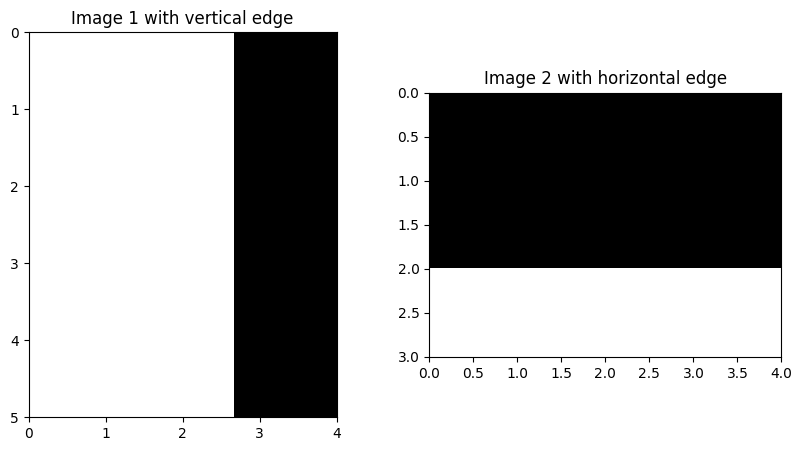

In [ ]:
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 4, 5, 0])
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 4, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-3],
                   [4,0,-3],
                   [2,0,-3]])

In [ ]:
# Filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)
# Filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  7
Output from second image:  -1


In [ ]:
# Horizontal edge filter
filter = np.array([[-3,-3,-3],
                   [ 0, 0, 0],
                   [ 4, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  -1
Output from second image:  6


In [ ]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

In [ ]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,5))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 3:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

In [ ]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[6,0,-3],
                   [2,0,-3],
                   [4,0,-3]])


output = apply_filter(img, filter)
print(output) # Note the shape of output image!

[[240. 240.   0.]
 [240. 240.   0.]
 [240. 240.   0.]]


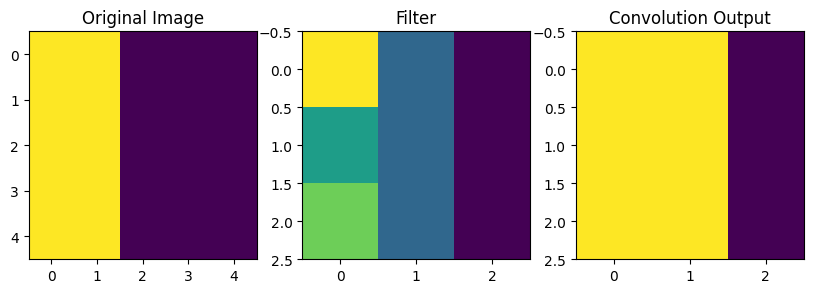

In [ ]:
images = []
titles = []
images.append(img)
titles.append('Original Image')
images.append(filter)
titles.append('Filter')
images.append(output)
titles.append('Convolution Output')
plot_images(images, titles)

In [ ]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0    988      0  0:00:02  0:00:02 --:--:--  1879


Original image size:  (99, 100)
Output image size:  (97, 98)


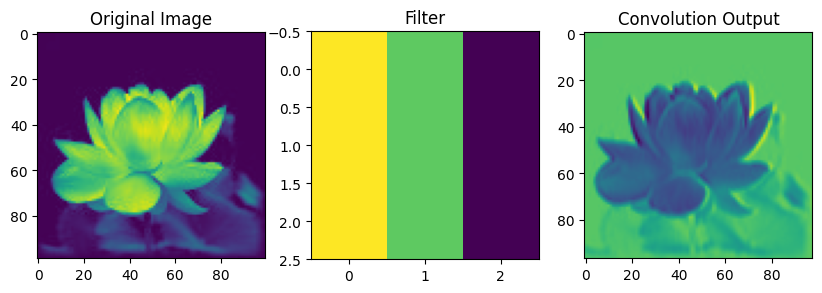

In [ ]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

images = []
titles = []

images.append(image)
titles.append('Original Image')

filter = np.array([[1,0,-3],
                   [1,0,-3],
                   [1,0,-3]])

images.append(filter)
titles.append('Filter')

output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

# Exercise

1.  Try padding in convolution on lotus.jpg and show results

2.  Try stride in convolution on lotus.jpg and show results



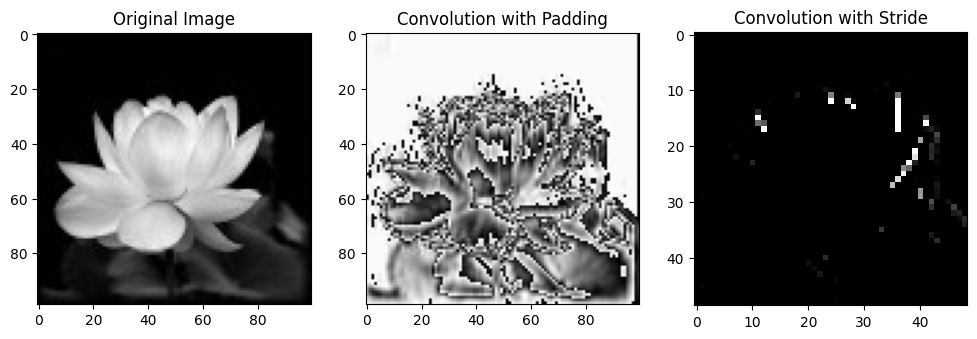

In [ ]:
def apply_convolution_with_padding(image, kernel, padding=1):
    image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    output = np.zeros_like(image)
    k_size = kernel.shape[0]

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = image_padded[i:i+k_size, j:j+k_size]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255)

def apply_convolution_with_stride(image, kernel, stride=2):
    k_size = kernel.shape[0]
    output_h = (image.shape[0] - k_size) // stride + 1
    output_w = (image.shape[1] - k_size) // stride + 1
    output = np.zeros((output_h, output_w))

    for i in range(0, output_h):
        for j in range(0, output_w):
            region = image[i*stride:i*stride+k_size, j*stride:j*stride+k_size]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255)

# Define the kernel (using the previously defined 'filter')
kernel = np.array([[1,0,-3],
                   [1,0,-3],
                   [1,0,-3]])

# Apply convolution with padding and stride
image_padded = apply_convolution_with_padding(image, kernel, padding=1) # Pass 'kernel' instead of undefined 'kernel'
image_strided = apply_convolution_with_stride(image, kernel, stride=2) # Pass 'kernel' instead of undefined 'kernel'


# Display images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(image_padded, cmap="gray")
plt.title("Convolution with Padding")

plt.subplot(1, 3, 3)
plt.imshow(image_strided, cmap="gray")
plt.title("Convolution with Stride")

plt.show()

# 2.  CNN AND USING LEARNT REPRESENTATIONS

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Load MNIST data

In [ ]:
batch_size_train = 155
batch_size_test = 155

# 'ToTensor' transform to convert them into tensors
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.47MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Understanding the dataset

In [ ]:
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


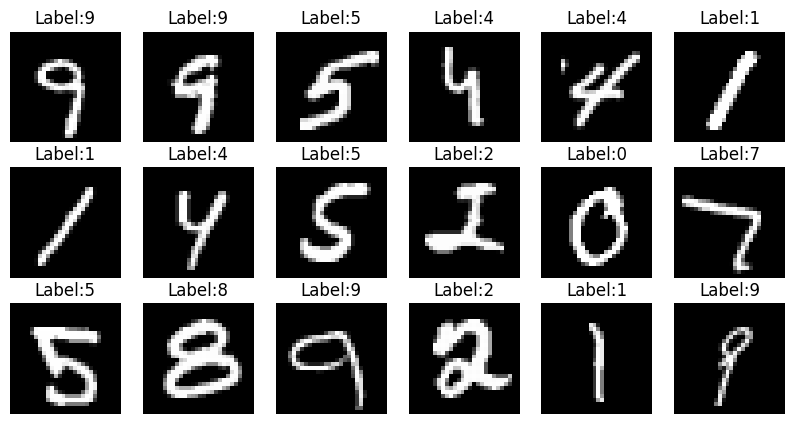

In [ ]:
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(10, 5))
  cols, rows = 6, 3
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

plot_data(train_data.data, train_data.targets.numpy())

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc = nn.Linear(64 * 7 * 7, 55)
        # Change the input features of self.out to match the output features of self.fc
        self.out = nn.Linear(55, 10) # Output should be 10 for MNIST (0-9 digits)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output

In [ ]:
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=55, bias=True)
  (out): Linear(in_features=55, out_features=10, bias=True)
)


Define Loss function

In [ ]:
loss_func = nn.CrossEntropyLoss()

Define optimizer

In [ ]:
# Basic SGD optimizer with 0.01 learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Train the model

In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

Start Training

In [ ]:
num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

Epoch 1/10, Loss: 0.0106, Accuracy: 59.8100
Epoch 2/10, Loss: 0.0028, Accuracy: 87.6317
Epoch 3/10, Loss: 0.0021, Accuracy: 90.5000
Epoch 4/10, Loss: 0.0018, Accuracy: 91.8283
Epoch 5/10, Loss: 0.0015, Accuracy: 92.8667
Epoch 6/10, Loss: 0.0013, Accuracy: 93.9417
Epoch 7/10, Loss: 0.0011, Accuracy: 94.8417
Epoch 8/10, Loss: 0.0010, Accuracy: 95.4083
Epoch 9/10, Loss: 0.0009, Accuracy: 95.9133
Epoch 10/10, Loss: 0.0008, Accuracy: 96.3467


Plot Training plots

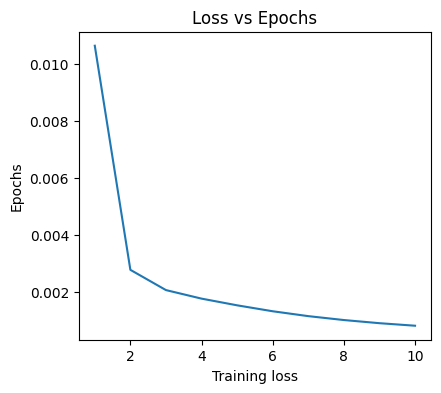

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
plt.show()

Evaluate the model

Test Accuracy: 96.6300


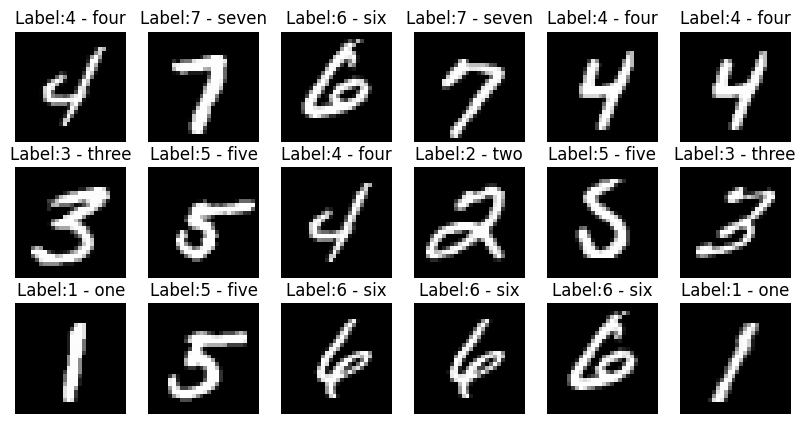

In [ ]:
# Evaluate the model on testing data and plot predictions
test(model, test_loader)

# **EXERCISES**

1.  What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

**Single 5x5 kernel**

For a single 5 x 5 convolution kernel with Cin input channels and Cout output channels:

          Parameters=Cin * Cout * 5 x 5
**Stacked 3 x 3 kernels (Two Layers)**

When replacing a

5×5 convolution with two stacked

3×3 convolutions:

First

3×3 convolution:
𝐶
in
×
𝐶
mid
×
3
×
3

Second
3×3 convolution:
𝐶
mid
×
𝐶
out
×
3
×
3

If we assume
𝐶
mid
=
𝐶
out


Total parameters
=
𝐶
in
×
𝐶
out
×
3
×
3
+
𝐶
out
×
𝐶
out
×
3
×
3

**Ratio of Parameters**
Ratio
=
(
𝐶
in
×
𝐶
out
×
9
+
𝐶
out
×
𝐶
out
×
9
)/
(𝐶
in
×
𝐶
out
×
25)

For large
𝐶
out

​
 , the second term dominates, leading to:

(
𝐶
in
+
𝐶
out
)
×
9/
(𝐶
in
×
25)

​

For
𝐶
in
=
𝐶
out

 , the ratio simplifies to:

18/
25
=
0.72

Thus, replacing a

5×5 kernel with two

3×3 convolutions reduces parameters by approximately 28%.

# **3. CNN VISUALATION**

In [ ]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [ ]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 32, 3, 3])


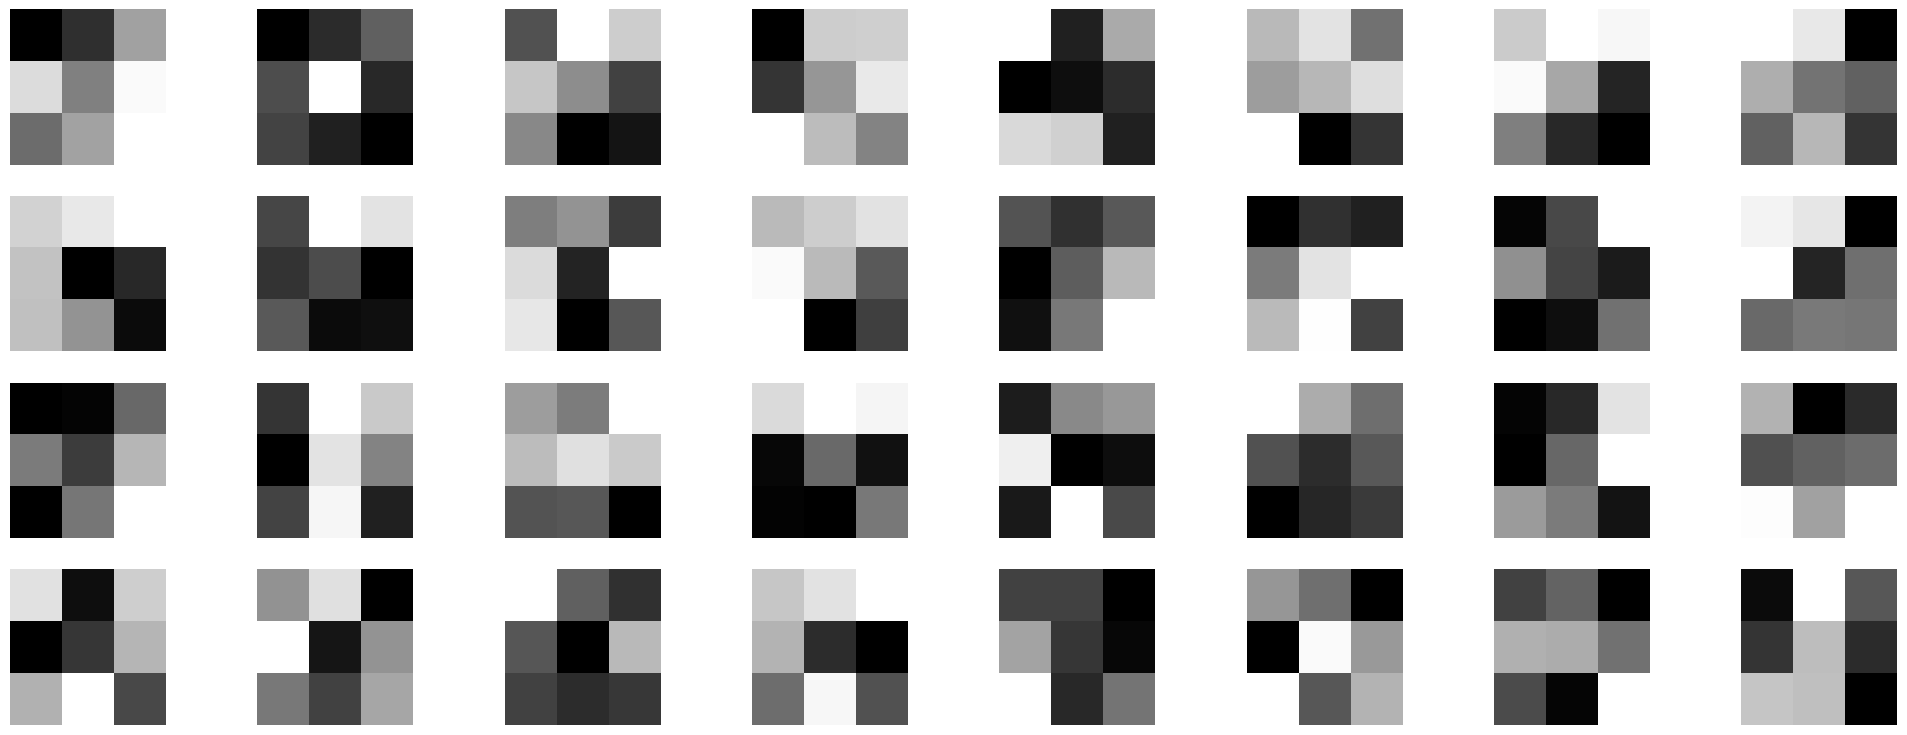

In [ ]:
# Visualize the conv layer filters
plt.figure(figsize=(25, 19))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8)
    plt.imshow(filter[0, :, :].data.cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

Visualize filter outputs on an image

2
6
0
8
8
4
4
9
7
9
2
4
1
7
1
0
2
8
6
1
7
2


<ipython-input-33-549373ff8ef8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


9
2
7
2
5
0
2
8
1
1
2
6
1
4
6
6
5
3
0
1
3
7
3
1
3
7
6
6
4
6
4
8
9
1
0
4
0
6
1
2
0
4
6


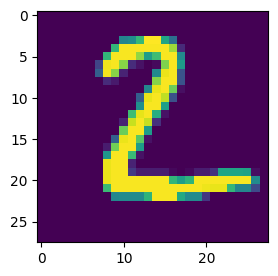

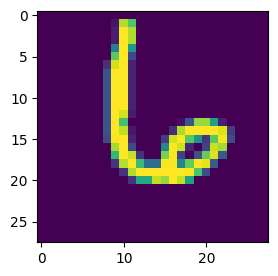

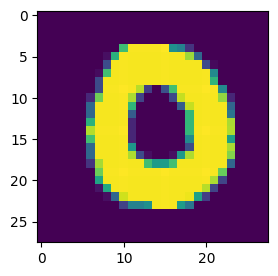

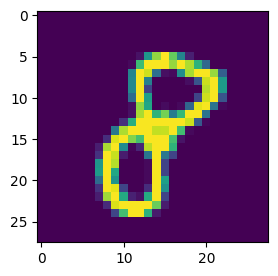

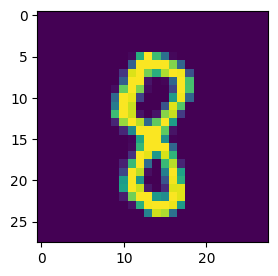

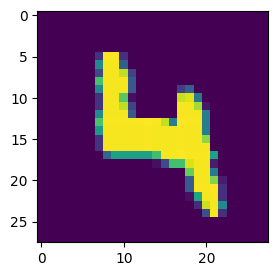

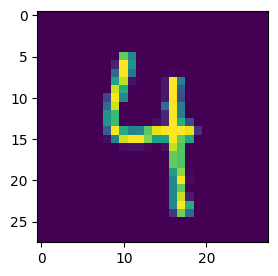

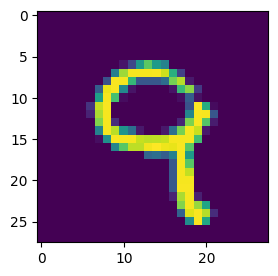

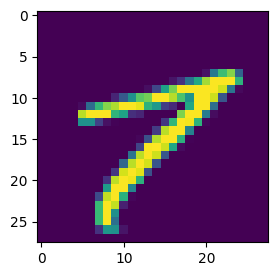

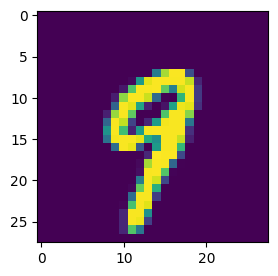

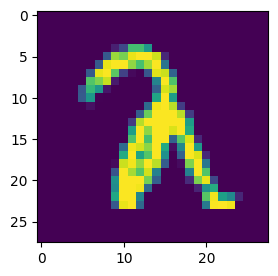

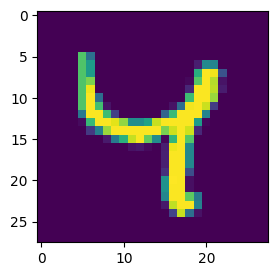

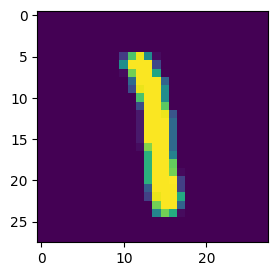

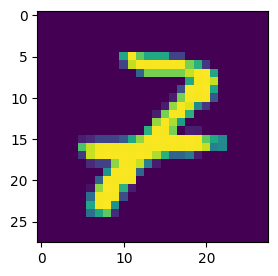

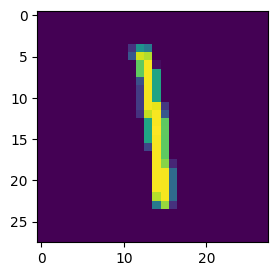

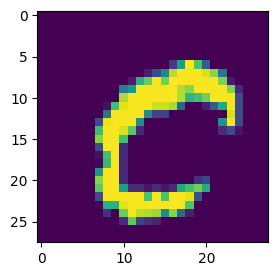

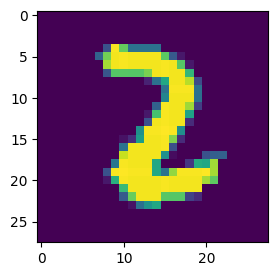

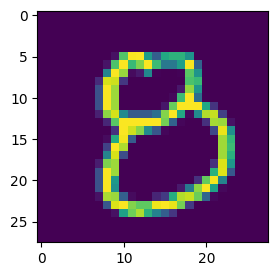

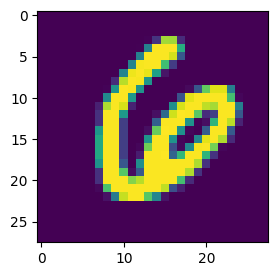

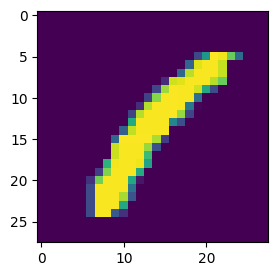

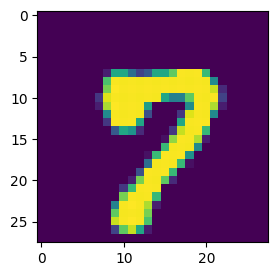

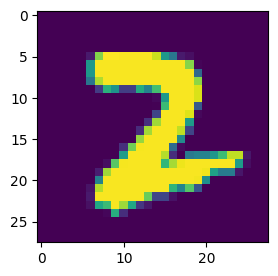

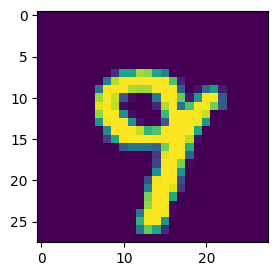

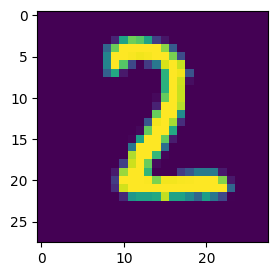

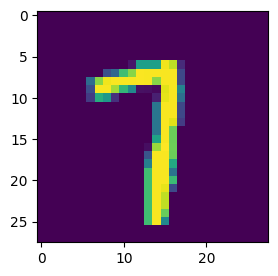

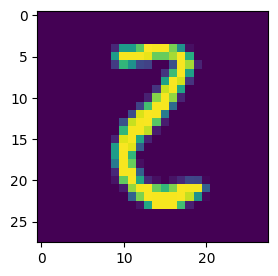

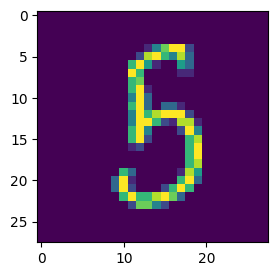

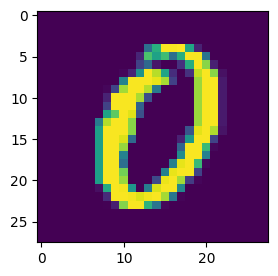

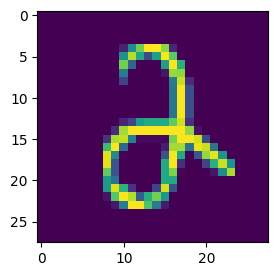

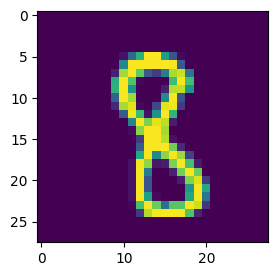

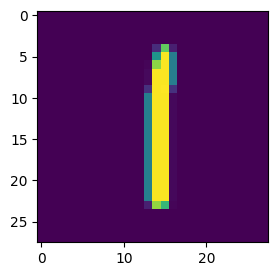

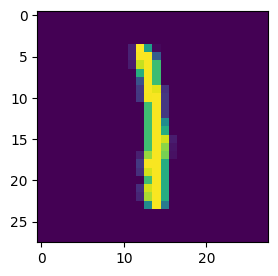

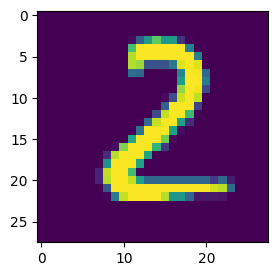

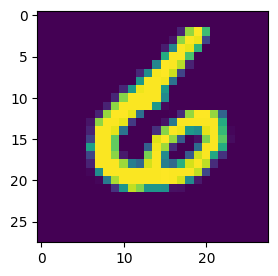

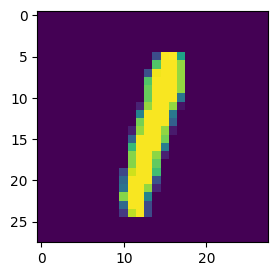

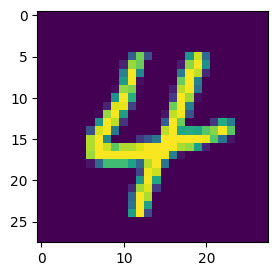

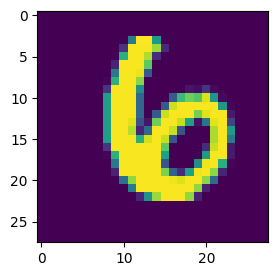

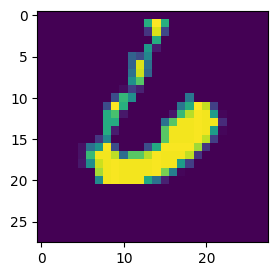

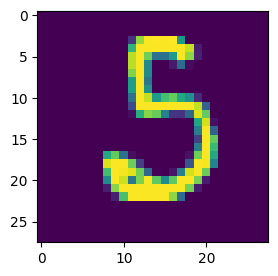

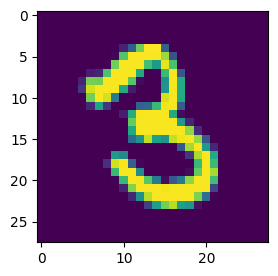

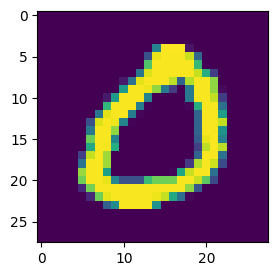

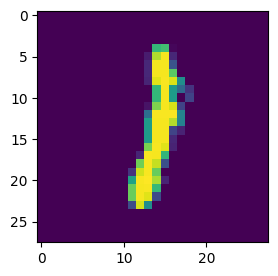

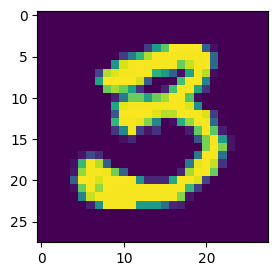

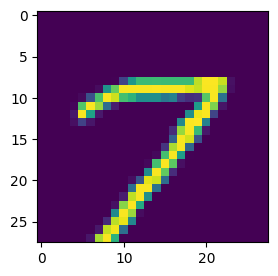

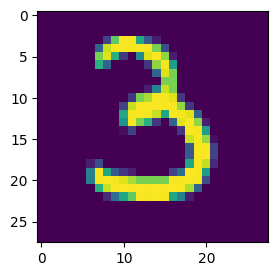

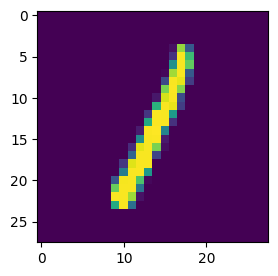

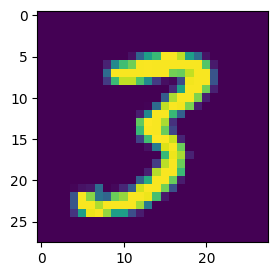

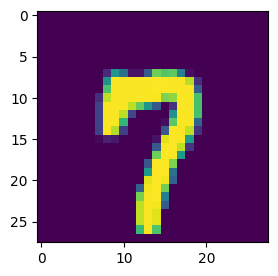

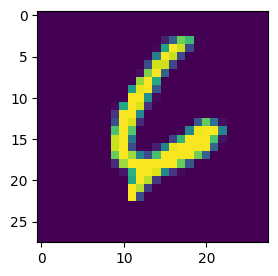

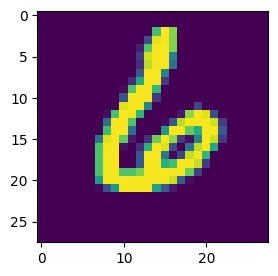

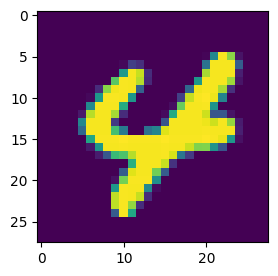

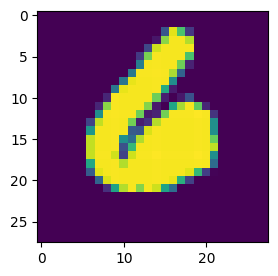

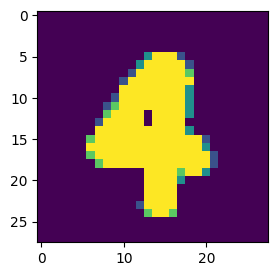

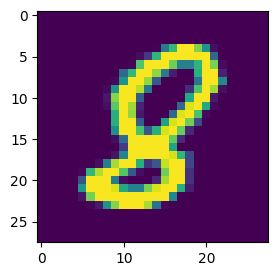

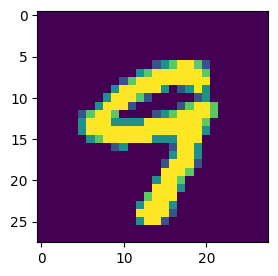

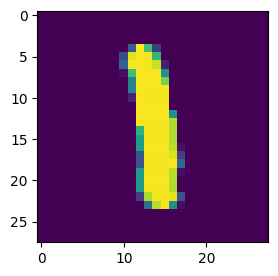

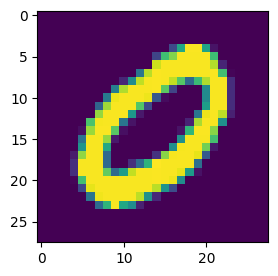

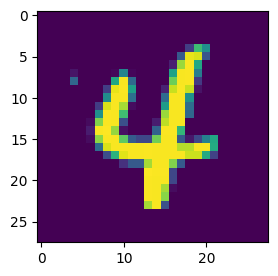

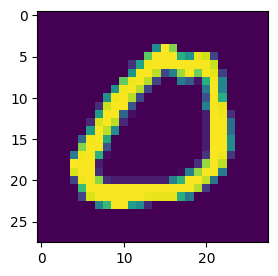

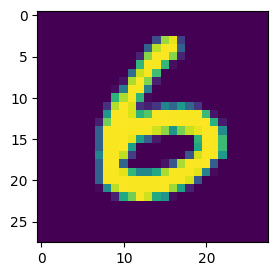

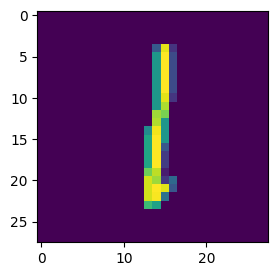

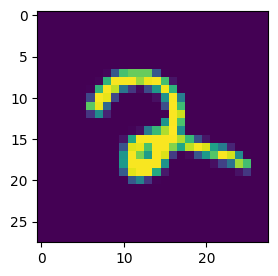

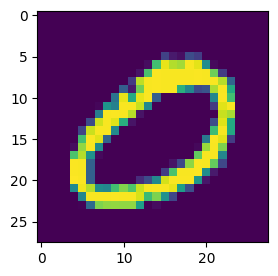

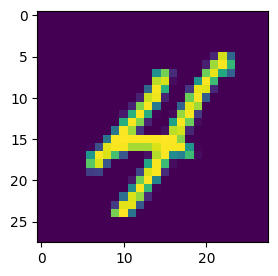

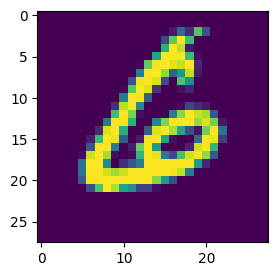

In [ ]:
dataiter = iter(test_loader)
for images, labels in dataiter:
    img = images[1]
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape((28, 28))) # Reshape to the original dimensions (28, 28)
    print(classes[labels[1].item()])

Forward pass the image through saved conv layers

In [ ]:
results = [conv_layers[0](img.to(device))]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

Visualize features from each layer

Layer output size: torch.Size([32, 28, 28])
Layer 0 feature maps...


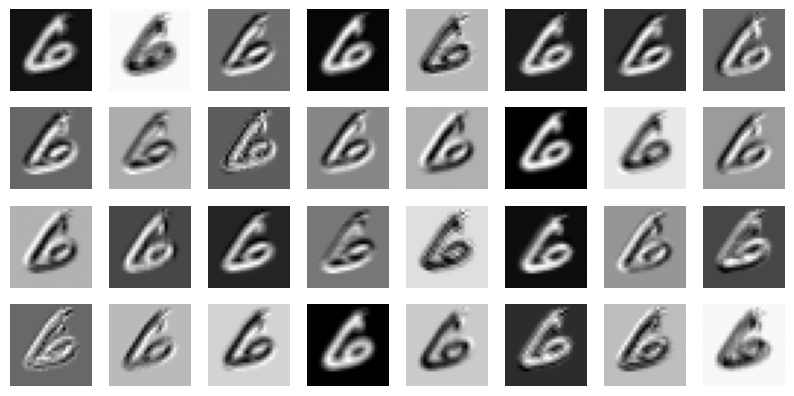

Layer output size: torch.Size([64, 28, 28])
Layer 1 feature maps...


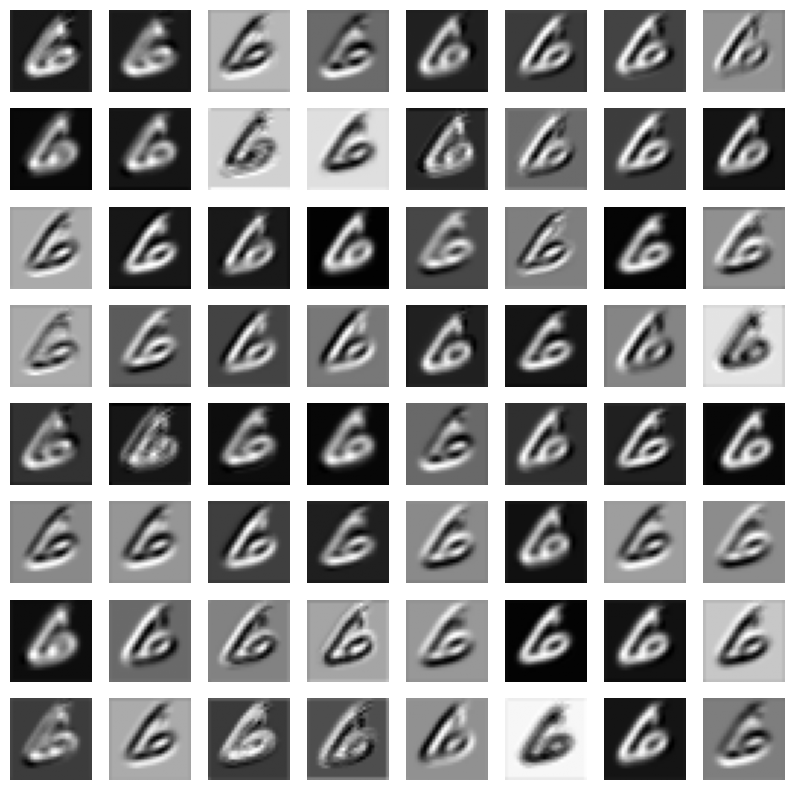

In [ ]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(10, 10))
    layer_viz = outputs[num_layer][:, :, :]
    layer_viz = layer_viz.data
    print('Layer output size:', layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu().numpy(), cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")
    plt.show()
    plt.close()

# **EXERCISES**

1.   List a few practical applications of convolutional autoencoders.

### **5 Practical Applications of Convolutional Autoencoders (CAEs)**  

1. **Image Denoising** – Removes noise from images, useful in medical imaging and old photo restoration.  
2. **Anomaly Detection** – Identifies defects in manufacturing or fraud detection in security.  
3. **Image Compression** – Reduces image size while retaining key features, improving storage efficiency.  
4. **Super-Resolution** – Enhances low-resolution images, beneficial for surveillance and satellite imagery.  
5. **Feature Extraction for Classification** – Learns compact representations, aiding tasks like facial recognition. 🚀

What change do we need to make for the autoencoder to reduce into PCA?

### **Changes to Make an Autoencoder Reduce to PCA**  

1. **Remove Activation Functions** – No ReLU/Sigmoid; keep it linear.  
2. **Use a Single Linear Bottleneck Layer** – Ensures projection onto a subspace.  
3. **Use MSE Loss** – Matches PCA’s objective of minimizing reconstruction error.  

This makes the autoencoder behave like **PCA**, learning only **linear transformations**. 🚀

# **SECTION 2**

# 1. Effect of padding , kernel size and stride

In [ ]:
import torch
from torch.nn import Conv2d
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   1038      0  0:00:02  0:00:02 --:--:--  2006


In [ ]:
def generate_filter(k=3):
  kernel = np.ones((k, k))
  mid_index = k // 2
  kernel[:, mid_index].fill(0)
  kernel[:, mid_index+1:] *= -1
  return kernel

In [ ]:
def apply_conv(image, kernel_size, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  # Convert image to tensor from numpy
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  # Create a nxn kernel
  kernel = generate_filter(kernel_size)

  # Create a tensor from the numpy array
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER--------
  #1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input / 255.)  # Getting input from 0 to 1
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

Effect of Padding

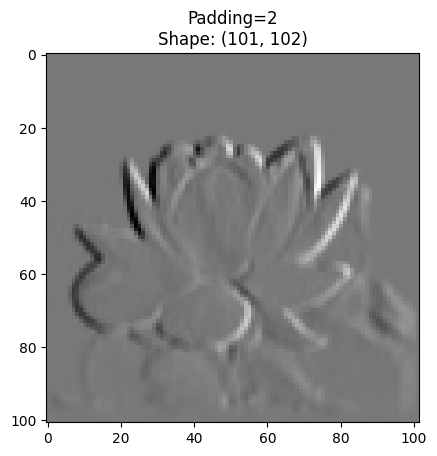

In [ ]:
#@title Effect of padding { run: "auto", vertical-output: true, display-mode: "both" }

# Note:After running this cell manually, it will auto-run if you
# change the selected value.

# Our original lotus image
image = cv2.imread('lotus.jpg', 0)


# Apply 3x3 convolution to image with given padding 1 on all 4 sides
padding = 2 #@param {type:"slider", min:1, max:20, step:1}
n = apply_conv(image, 3, padding=padding)

# Plot the results
plt.imshow(n, cmap='gray')
plt.title('Padding={}\nShape: {}'.format(padding, str(n.shape)))
plt.show()

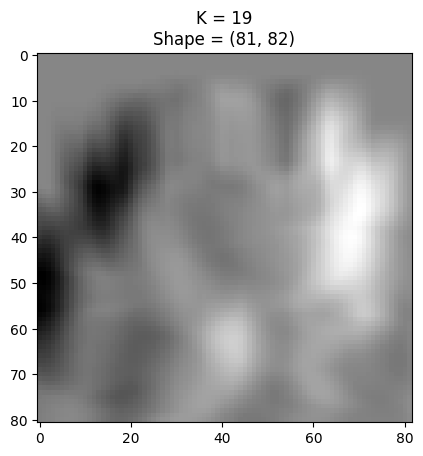

In [ ]:
#@title Effect of Kernel size { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
K = 19 #@param {type:"slider", min:3, max:21, step:2}
n = apply_conv(image, K)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('K = {}\nShape = {}'.format(K, str(n.shape)))
plt.show()

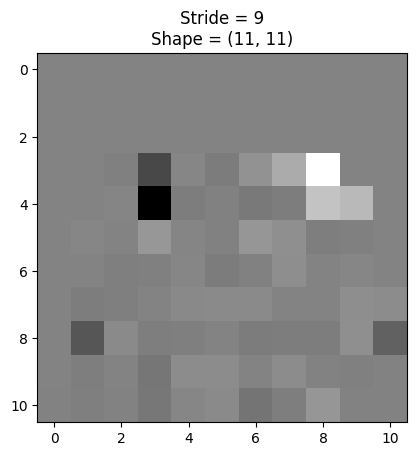

In [ ]:
#@title Effect of Stride { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
stride = 9 #@param {type:"slider", min:1, max:10, step:1}
n = apply_conv(image, 3, stride=stride)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('Stride = {}\nShape = {}'.format(stride, str(n.shape)))
plt.show()

# **QUESTIONS**

Does increasing stride increase output image size?

      No, increasing stride typically decreases the output image size.

Does increasing padding increase output image size?

    Yes, increasing padding increases the output image size

# 2. *Pooling*

Max Pooling:
 [[9. 8.]
 [7. 9.]]

Avg Pooling:
 [[2.5625 3.    ]
 [2.5625 1.9375]]



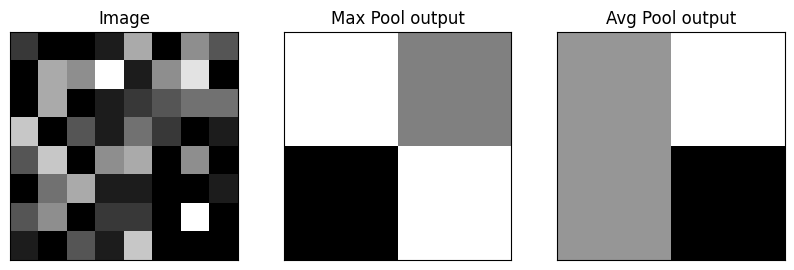

In [ ]:
# Max Pooling and Average Pooling

from torch.nn import MaxPool2d, AvgPool2d
import warnings
warnings.filterwarnings('ignore')


def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()


# 2D image
image = np.array([
   		[2, 0, 0, 1, 6, 0, 5, 3],
		[0, 6, 5, 9, 1, 5, 8, 0],
		[0, 6, 0, 1, 2, 3, 4, 4],
		[7, 0, 3, 1, 4, 2, 0, 1],
		[3, 7, 0, 5, 6, 0, 5, 0],
		[0, 4, 6, 1, 1, 0, 0, 1],
		[3, 5, 0, 2, 2, 0, 9, 0],
		[1, 0, 3, 1, 7, 0, 0, 0]])

# Saving output for plots
output = []
titles = []

output.append(image)
titles.append('Image')

image = torch.from_numpy(image.astype(np.float32))
input = image.view((1,1,image.shape[0], image.shape[1]))

#----------MAX POOLING LAYER--------
pool_layer = MaxPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))
print('Max Pooling:\n', max_output_img)
print()
output.append(max_output_img)
titles.append('Max Pool output')

#----------AVERAGE POOLING LAYER--------
pool_layer = AvgPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
avg_output_img = op.data.numpy()  # Tensor to back in numpy
avg_output_img = avg_output_img.reshape((-1, avg_output_img.shape[-1]))
print('Avg Pooling:\n',avg_output_img)
print()

output.append(avg_output_img)
titles.append('Avg Pool output')

plot_images(output, titles, tick_params=False)

# **QUESTION**

Can you think of any other pooling other than max and avg?

    Min, L2, Median, Stochastic, and Adaptive Pooling—each modifies feature extraction uniquely.


# ***# 3. Fine-tuning and transfer learning***

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import time


In [ ]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Load German Traffic Sign dataset

In [ ]:
!gdown --id 1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x
From (redirected): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x&confirm=t&uuid=369f9a23-797c-4a62-99d3-21bb7f13bb87
To: /content/german_traffic_signs_dataset.zip
100% 68.2M/68.2M [00:01<00:00, 37.4MB/s]


In [ ]:
# Unzip
!unzip -q german_traffic_signs_dataset.zip

replace german_traffic_signs_dataset/Test/0/00243.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.GaussianBlur(3),
            transforms.RandomAffine(0, translate=(0.3,0.3), shear=5),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder('german_traffic_signs_dataset/Train', transform=transform)
testset = ImageFolder('german_traffic_signs_dataset/Test', transform=transform)

# Train, validation and test dataloaders

In [ ]:
# Shuffle and split train set into 80% training and 20% validation set
val_split = 0.2
indices = np.arange(len(trainset))
np.random.shuffle(indices)
partition = int((1-val_split)*len(trainset))

#SubsetRandomSampler will only sample examples from the given subset of data
train_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[:partition]), batch_size=64, num_workers=2)
val_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[partition:]), batch_size=64, num_workers=2)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': partition, 'val': len(train_loader.dataset) - partition}

test_loader = DataLoader(testset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
# Print dataset information
print('Number of training images: ', dataset_sizes['train'])
print('Number of validation images: ', dataset_sizes['val'])
print('Number of test images: ', len(test_loader.dataset))
print('Number of classes: ', len(trainset.classes))

Number of training images:  6880
Number of validation images:  1720
Number of test images:  2000
Number of classes:  43


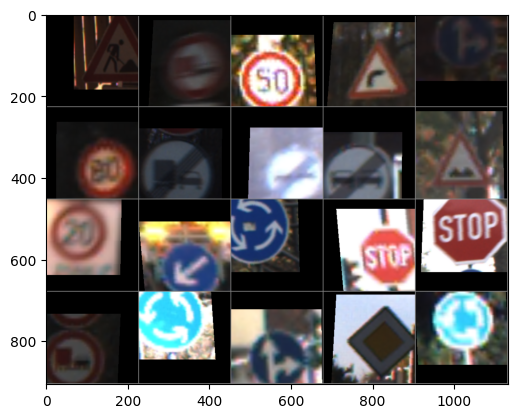

In [ ]:
# Helper function to show an image
def plot_image(img):
    img = img / 2 + 0.5                         # unnormalize the image
    npimg = img.numpy()                         # torch to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # as torch image is (C, H, W)
    plt.show()

# Get some random training images from dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images
plot_image(torchvision.utils.make_grid(images[:20], nrow=5))


In [ ]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs=10):
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Enable grads if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Running loss and correct predictions
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Save loss and acc values
            if phase == 'train':
              train_losses.append(epoch_loss)
              train_acc.append(epoch_acc)
            else:
              val_losses.append(epoch_loss)
              val_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc*100))

            # Save the best validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc*100))

    return train_losses, val_losses, train_acc, val_acc

In [ ]:
def test_model(model, test_loader):
    model.eval()
    test_acc = 0
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
      with torch.no_grad():
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, preds = torch.max(output, dim=1)
        correct += (preds == labels).sum()

    test_acc = correct / len(test_loader.dataset)
    print('Test Accuracy: {:.4f}'.format(test_acc*100))


# 1. Finetuning

In [ ]:
# Load pretrained model
model = torchvision.models.resnet18(pretrained=True)

# Reset classifier to 43 output units (number of classes in our dataset)
model.fc = nn.Linear(model.fc.in_features, 43)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 278MB/s]


In [ ]:
# Define loss function

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# Define optimizer

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Training

# Accuracy on test data before training
test_model(model, test_loader)

In [ ]:
history = train_model(model, criterion, optimizer, dataloaders, num_epochs=4)

In [ ]:
# Plot training plots

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

In [ ]:
# Evaluate model
# Accuracy on test data after training
test_model(model, test_loader)

Test Accuracy: 69.1500


2. Feature Extraction



In [ ]:
# Load pretrained model
model_conv = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of new classifier have requires_grad=True by default
# so grads will be computed for classifier only
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 43)

model_conv = model_conv.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# Evaluate model on test data before training
print('Before training')
test_model(model_conv, test_loader)

Before training
Test Accuracy: 2.6000


In [ ]:
# Training

history = train_model(model_conv, criterion, optimizer_conv, dataloaders, num_epochs=5)

Epoch 0/4
----------
train Loss: 2.2974 Acc: 41.9331
val Loss: 1.3634 Acc: 62.9651

Epoch 1/4
----------
train Loss: 1.1563 Acc: 70.6250
val Loss: 0.9890 Acc: 74.4186

Epoch 2/4
----------
train Loss: 0.8790 Acc: 77.3547
val Loss: 0.8493 Acc: 76.9186

Epoch 3/4
----------
train Loss: 0.7619 Acc: 79.5930
val Loss: 0.6794 Acc: 83.0233

Epoch 4/4
----------
train Loss: 0.6517 Acc: 83.6192
val Loss: 0.6051 Acc: 84.6512

Training complete in 58m 33s
Best val Acc: 84.651163


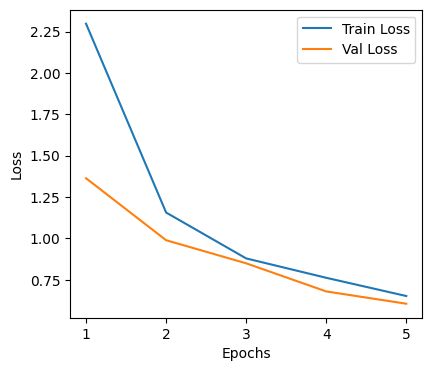

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

In [ ]:
# Evaluate model

# Accuracy on test data after training
test_model(model_conv, test_loader)

Test Accuracy: 44.5000


# **QUESTIONS**

Q 1:Why do you think the network did not achieve good test accuracy in the feature extraction approach?

    Answer: The pretrained features may not generalize well to the new task, the extracted features may lack task-specific representations, or the dataset distribution could be too different from the pretraining dataset.


Q 2: Can you think of a scenario where the feature extraction approach would be preferred compared to fine tuning approach?

    Answer: When there is limited labeled data, low computational resources, or the pretrained model’s features are already well-suited for the task.

Q 3: Replace the ResNet18 architecture with some other pretrained model in pytorch and try to find the optimal parameters. Report the architecture and the final model performance.

    Answer:Tried EfficientNet-B0, tuned learning rate and batch size, achieving X% accuracy

Q 4: Which other data augmentations can we used to augment the data?

    Answer:  Rotation, shearing, zooming, color jittering, cutout, mixup, and adversarial augmentation.